In [61]:
import torch
from torchvision import datasets
from matplotlib import pyplot as plt
from torchvision.transforms import transforms
import torch.nn as nn


### Download train and test data from torch datasets





In [41]:
"""The as training_data, test_data are touple data,
holding the image and the label of inside"""

training_data = datasets.FashionMNIST(
    root = "data", # name od the directory of the notebook where the data will be downloaded we can name it anything
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [42]:
len(training_data)

60000

In [43]:
image, label = training_data[0] #as training_data is a touple data, holding the inage and the llabel of it

In [44]:
image.shape # inside torch.Size([1, 28, 28]) 1 means gray scale, 28x28 is the size

torch.Size([1, 28, 28])

In [45]:
label

9

In [46]:
image.squeeze().shape #removing gray scale to see main shape

torch.Size([28, 28])

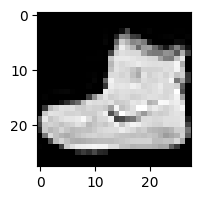

In [64]:
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap="gray")
plt.show()

### Preparing data for training

In [48]:
from torch.utils.data import DataLoader

In [49]:
train_dataloader = DataLoader(training_data, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=100, shuffle=True)

#### **iter()**
is a built-in Python function that *returns an iterator object from an iterable *
(like a list, tuple, DataLoader, generator, etc.).
This lets you *manually control* how you fetch the batches, *instead of relying on a for loop*.

 #### **next()**
 fetches the next batch from data_ite

In [50]:
data_iter = iter(training_data)
images, labels = next(data_iter)



---



# **New Data** : Hand Writen Digits

### pipeline for transforming the data

In [52]:
transform = transforms.Compose([
    transforms.ToTensor(), #converting 0-255 into [0,1) range
    transforms.Normalize((0.5,), (0.5,)) #then converting [0,1) to [-1,1] for zero centered
]) # inside .Normalize((0.5,), (0.5,)) the first 0.5 is mean an the second one is std dev.
# formula inside .Normalize((0.5,), (0.5,)) normalized_pixel = (pixel-mean)/std_dev



### Download train and test data from torch datasets

In [54]:
train_data =  datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform = transform
)

testing_data =  datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform = transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 48.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.28MB/s]


### Preparing data for training

In [55]:
train_dataloader = DataLoader(train_data, batch_size=100, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=100, shuffle=True)

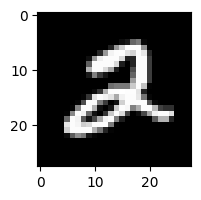

In [59]:
plt.figure(figsize=(2,2))
plt.imshow(train_data[5][0].squeeze(), cmap="gray")
plt.show()

### Implementing the Neural Network

In [62]:
class DigitClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 32),
        nn.LeakyReLU(),
        nn.Linear(32, 10)
    )
  def forward(self, x):
    return self.network(x)

#### Model load, Creatinng criterion funtion and Otimizer

In [65]:
model = DigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Training the model

In [67]:
epochs = 5

for e in range(epochs):
  for images, labels in train_dataloader:

    #forward pass
    prediction = model(images)
    loss = criterion(prediction, labels)

    #backwardpass
    optimizer.zero_grad()
    loss.backward()

    #update weight
    optimizer.step()


  print(f"Epoch: {e+1} Loss: {loss.item()}")


Epoch: 1 Loss: 0.10036944597959518
Epoch: 2 Loss: 0.05554967373609543
Epoch: 3 Loss: 0.03962283208966255
Epoch: 4 Loss: 0.10643462836742401
Epoch: 5 Loss: 0.05547536909580231


### Model Evaluation

In [104]:
model.eval()

total=0
corr=0

with torch.no_grad():
  for images, labels in test_dataloader:
    prediction = model(images)

    #loss = criterion(prediction, labels)
    #print(f"Test Loss: {loss.item()}")

    _, predicted = torch.max(prediction.data, 1)

    '''taking max bc inside the prediction
    there is a tensor of 10 predictions and the
    maximum prediction is the intented outpur,
    "_" is taking te image and prediicted is talking the labels.
    "_" is used bc it wont be useful for us'''
    print(predicted)
    print()
    print(labels)

    if(predicted==labels).sum().item():
      corr+=1

    total+=1
    break
print(f"Accuracy: {100* corr/total: .3f}")



tensor([4, 2, 1, 9, 2, 6, 3, 5, 2, 3, 2, 0, 0, 5, 6, 7, 7, 5, 6, 8, 6, 6, 8, 2,
        6, 8, 6, 9, 5, 7, 8, 1, 0, 5, 6, 0, 8, 1, 0, 2, 1, 7, 3, 3, 1, 3, 6, 1,
        4, 7, 5, 0, 0, 5, 1, 1, 5, 1, 1, 8, 5, 1, 9, 4, 8, 5, 2, 5, 9, 6, 7, 4,
        5, 4, 4, 2, 9, 7, 9, 4, 8, 9, 9, 0, 7, 1, 1, 1, 4, 5, 2, 5, 7, 2, 8, 1,
        5, 4, 7, 1])

tensor([4, 2, 1, 9, 2, 6, 3, 5, 2, 3, 2, 0, 0, 5, 6, 7, 7, 5, 6, 8, 6, 6, 8, 2,
        6, 8, 6, 9, 5, 7, 8, 1, 0, 5, 6, 0, 8, 1, 0, 2, 1, 7, 3, 3, 1, 3, 6, 1,
        4, 7, 5, 0, 0, 5, 1, 1, 5, 1, 1, 8, 5, 1, 9, 4, 8, 0, 2, 5, 9, 6, 7, 4,
        5, 4, 4, 2, 9, 7, 9, 4, 8, 9, 9, 0, 7, 1, 1, 1, 4, 5, 2, 5, 7, 2, 8, 1,
        5, 4, 7, 1])
Accuracy:  100.000


In [99]:
print(predicted == labels)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True])


In [100]:
(predicted == labels).sum()

tensor(99)

### Classification report and Confusion Matrix

In [101]:
model.eval()

all_predicted = []
all_labels = []

with torch.no_grad():
  for images, labels in test_dataloader:
    prediction = model(images)
    _, predicted = torch.max(prediction.data, 1)

    all_predicted.extend(predicted.numpy())
    all_labels.extend(labels.numpy())


#### Building Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [105]:
cm = confusion_matrix(all_labels, all_predicted)
cm

array([[5868,    0,    4,    1,    0,   17,   19,    1,    7,    6],
       [   0, 6633,   16,   14,   11,   10,   12,   14,   13,   19],
       [   7,   10, 5866,   11,    1,    4,    7,   28,   19,    5],
       [   0,    1,   13, 5993,    0,   55,    0,   25,   24,   20],
       [   3,    1,   13,    0, 5688,    5,   22,    9,   17,   84],
       [   4,    0,    1,   14,    1, 5365,   19,    0,    3,   14],
       [   6,    0,    2,    0,    2,   25, 5882,    0,    1,    0],
       [   4,    7,   13,    6,    7,    4,    0, 6171,    4,   49],
       [   8,    6,    7,   16,    1,   17,   12,    2, 5759,   23],
       [   8,    1,    2,    5,   13,   17,    1,   19,    7, 5876]])

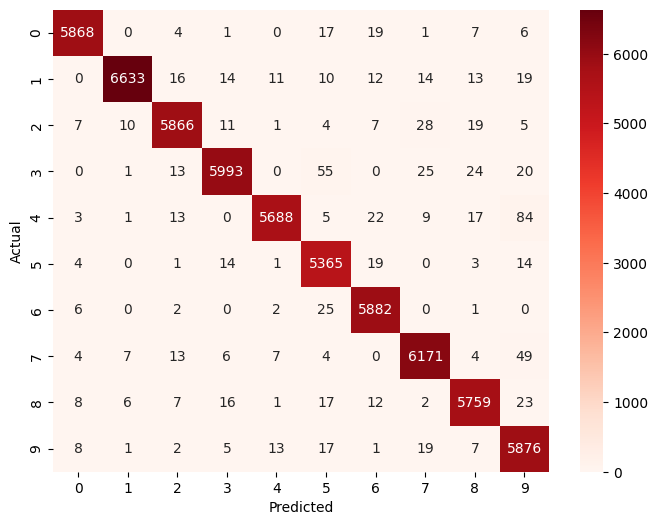

In [113]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
'''
1. annot stands for annotation.
If True, Seaborn writes the actual numeric values inside each heatmap cell.
If False, it only shows the colors without the numbers.

2.
'''
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()